In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
big_df = pd.read_csv(r'D:\Graduation Project\QuadPlane Design\APC Propellers\PERFILES_WEB\all_props_cleaned_petite.csv')
big_df.head()

,V,Thrust,diameter,pitch,rpm
0,0.0,0.032,10.5,4.5,1000.0
1,0.2,0.032,10.5,4.5,1000.0
2,0.4,0.031,10.5,4.5,1000.0
3,0.7,0.031,10.5,4.5,1000.0
4,0.9,0.030,10.5,4.5,1000.0


In [3]:
import tensorflow as tf

In [4]:
dataset = big_df.copy()
dataset.tail()

,V,Thrust,diameter,pitch,rpm
293474,191.0,4.365,9.0,9.0,21000.0
293475,198.7,3.338,9.0,9.0,21000.0
293476,206.3,2.277,9.0,9.0,21000.0
293477,214.0,1.189,9.0,9.0,21000.0
293478,221.6,0.009,9.0,9.0,21000.0


In [5]:
dataset.isna().sum()

V           0
Thrust      1
diameter    0
pitch       0
rpm         0
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isna().sum()

V           0
Thrust      0
diameter    0
pitch       0
rpm         0
dtype: int64

In [8]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.tail()

,V,Thrust,diameter,pitch,rpm
128473,68.4,34.477,20.00,14.00,9000.0
216443,89.8,5.334,7.00,5.00,26000.0
153175,217.4,1.552,4.75,4.75,43000.0
101545,59.9,19.442,16.00,4.00,15000.0
207862,85.6,1.142,7.80,7.00,13000.0


In [9]:
train_labels = train_dataset.pop('Thrust')
test_labels = test_dataset.pop('Thrust')
train_dataset.head()

,V,diameter,pitch,rpm
112269,39.3,18.1,10.0,5000.0
201258,5.3,7.4,7.6,18000.0
185035,51.3,6.5,3.7,17000.0
129423,33.9,20.0,15.0,9000.0
13743,26.3,10.0,8.0,20000.0


In [10]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
V,234782.0,49.707743,45.637459,-42.0,13.6,36.20,73.8,319.6
diameter,234782.0,10.523603,4.487367,4.0,7.0,9.25,13.5,27.0
pitch,234782.0,7.308001,3.348207,2.0,4.5,6.50,10.0,22.5
rpm,234782.0,12508.699700,9050.014395,1000.0,6000.0,11000.00,17000.0,45000.0


In [11]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.head()

,V,diameter,pitch,rpm
112269,-0.228053,1.688384,0.804012,-0.829689
201258,-0.973055,-0.696088,0.087211,0.606773
185035,0.034889,-0.896651,-1.077592,0.496275
129423,-0.346376,2.111795,2.297349,-0.387701
13743,-0.512906,-0.116684,0.206678,0.827767


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=[len(train_dataset.keys())]),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.Adam()

model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

model.summary()

W1023 01:13:46.402871 23836 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               640       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 165,505
Trainable params: 165,505
Non-trainable params: 0
_________________________________________________________________


In [13]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.10267355],
       [-0.0149912 ],
       [-0.04691626],
       [-0.13365386],
       [ 0.01227346],
       [-0.00992726],
       [-0.0901207 ],
       [-0.11226162],
       [ 0.04630647],
       [-0.02122986]], dtype=float32)

In [14]:
EPOCHS = 1000
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=1)

Train on 187825 samples, validate on 46957 samples
Epoch 1/1000
187825/187825 [==============================] - 13s 69us/sample - loss: 2.9725 - mean_absolute_error: 0.8402 - val_loss: 2.2991 - val_mean_absolute_error: 0.7606
Epoch 2/1000
187825/187825 [==============================] - 12s 63us/sample - loss: 1.7968 - mean_absolute_error: 0.6732 - val_loss: 1.4762 - val_mean_absolute_error: 0.5858
Epoch 3/1000
187825/187825 [==============================] - 12s 63us/sample - loss: 1.5891 - mean_absolute_error: 0.6298 - val_loss: 1.6574 - val_mean_absolute_error: 0.5880
Epoch 4/1000
187825/187825 [==============================] - 12s 65us/sample - loss: 1.5048 - mean_absolute_error: 0.6083 - val_loss: 1.5933 - val_mean_absolute_error: 0.6125
Epoch 5/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 1.4315 - mean_absolute_error: 0.5893 - val_loss: 1.3613 - val_mean_absolute_error: 0.5512
Epoch 6/1000
187825/187825 [==============================] - 11s 57u

187825/187825 [==============================] - 11s 56us/sample - loss: 0.8867 - mean_absolute_error: 0.4339 - val_loss: 0.9737 - val_mean_absolute_error: 0.4435
Epoch 48/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.8877 - mean_absolute_error: 0.4359 - val_loss: 0.9840 - val_mean_absolute_error: 0.4610
Epoch 49/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.8811 - mean_absolute_error: 0.4348 - val_loss: 0.9434 - val_mean_absolute_error: 0.4410
Epoch 50/1000
187825/187825 [==============================] - 10s 56us/sample - loss: 0.8779 - mean_absolute_error: 0.4339 - val_loss: 0.9993 - val_mean_absolute_error: 0.4634
Epoch 51/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.8707 - mean_absolute_error: 0.4306 - val_loss: 1.0298 - val_mean_absolute_error: 0.4610
Epoch 52/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.8664 - mean_absolute_error: 0.4326 - val

187825/187825 [==============================] - 11s 57us/sample - loss: 0.7388 - mean_absolute_error: 0.3993 - val_loss: 0.7798 - val_mean_absolute_error: 0.3998
Epoch 94/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.7413 - mean_absolute_error: 0.3984 - val_loss: 0.7948 - val_mean_absolute_error: 0.4094
Epoch 95/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.7445 - mean_absolute_error: 0.3995 - val_loss: 0.7801 - val_mean_absolute_error: 0.4102
Epoch 96/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.7508 - mean_absolute_error: 0.4012 - val_loss: 0.8518 - val_mean_absolute_error: 0.4264
Epoch 97/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.7801 - mean_absolute_error: 0.4042 - val_loss: 0.8720 - val_mean_absolute_error: 0.4144
Epoch 98/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.7466 - mean_absolute_error: 0.4004 - val

187825/187825 [==============================] - 10s 56us/sample - loss: 0.6777 - mean_absolute_error: 0.3830 - val_loss: 0.7608 - val_mean_absolute_error: 0.4009
Epoch 140/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.6867 - mean_absolute_error: 0.3821 - val_loss: 0.8315 - val_mean_absolute_error: 0.4145
Epoch 141/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.6885 - mean_absolute_error: 0.3832 - val_loss: 0.7509 - val_mean_absolute_error: 0.3973
Epoch 142/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.6756 - mean_absolute_error: 0.3813 - val_loss: 0.7288 - val_mean_absolute_error: 0.3847
Epoch 143/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.6704 - mean_absolute_error: 0.3797 - val_loss: 0.7700 - val_mean_absolute_error: 0.3973
Epoch 144/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.6726 - mean_absolute_error: 0.3795 

187825/187825 [==============================] - 11s 58us/sample - loss: 0.6411 - mean_absolute_error: 0.3717 - val_loss: 0.7301 - val_mean_absolute_error: 0.3997
Epoch 186/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.6409 - mean_absolute_error: 0.3724 - val_loss: 0.6981 - val_mean_absolute_error: 0.3881
Epoch 187/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.6350 - mean_absolute_error: 0.3704 - val_loss: 0.6827 - val_mean_absolute_error: 0.3797
Epoch 188/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.6367 - mean_absolute_error: 0.3732 - val_loss: 0.7383 - val_mean_absolute_error: 0.4022
Epoch 189/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.6300 - mean_absolute_error: 0.3701 - val_loss: 0.6941 - val_mean_absolute_error: 0.3965
Epoch 190/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.6384 - mean_absolute_error: 0.3724 

187825/187825 [==============================] - 11s 58us/sample - loss: 0.6100 - mean_absolute_error: 0.3662 - val_loss: 0.7064 - val_mean_absolute_error: 0.3778
Epoch 232/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.6179 - mean_absolute_error: 0.3647 - val_loss: 0.7343 - val_mean_absolute_error: 0.3979
Epoch 233/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.6195 - mean_absolute_error: 0.3656 - val_loss: 0.7076 - val_mean_absolute_error: 0.3745
Epoch 234/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.6069 - mean_absolute_error: 0.3652 - val_loss: 0.7965 - val_mean_absolute_error: 0.3946
Epoch 235/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.6229 - mean_absolute_error: 0.3673 - val_loss: 0.7095 - val_mean_absolute_error: 0.3869
Epoch 236/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.6132 - mean_absolute_error: 0.3666 

187825/187825 [==============================] - 11s 57us/sample - loss: 0.5998 - mean_absolute_error: 0.3615 - val_loss: 0.7876 - val_mean_absolute_error: 0.4089
Epoch 278/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.5908 - mean_absolute_error: 0.3584 - val_loss: 0.7428 - val_mean_absolute_error: 0.3866
Epoch 279/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.6024 - mean_absolute_error: 0.3602 - val_loss: 0.6604 - val_mean_absolute_error: 0.3710
Epoch 280/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.5992 - mean_absolute_error: 0.3601 - val_loss: 0.6905 - val_mean_absolute_error: 0.3653
Epoch 281/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5936 - mean_absolute_error: 0.3600 - val_loss: 0.7113 - val_mean_absolute_error: 0.4129
Epoch 282/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.5964 - mean_absolute_error: 0.3615 

187825/187825 [==============================] - 11s 57us/sample - loss: 0.5821 - mean_absolute_error: 0.3567 - val_loss: 0.7250 - val_mean_absolute_error: 0.3799
Epoch 324/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5890 - mean_absolute_error: 0.3559 - val_loss: 0.6522 - val_mean_absolute_error: 0.3755
Epoch 325/1000
187825/187825 [==============================] - 11s 60us/sample - loss: 0.5894 - mean_absolute_error: 0.3565 - val_loss: 0.6603 - val_mean_absolute_error: 0.3726
Epoch 326/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5790 - mean_absolute_error: 0.3556 - val_loss: 0.7484 - val_mean_absolute_error: 0.3961
Epoch 327/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5873 - mean_absolute_error: 0.3624 - val_loss: 0.6568 - val_mean_absolute_error: 0.3758
Epoch 328/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.5809 - mean_absolute_error: 0.3580 

187825/187825 [==============================] - 11s 58us/sample - loss: 0.5701 - mean_absolute_error: 0.3517 - val_loss: 0.6264 - val_mean_absolute_error: 0.3566
Epoch 370/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.6061 - mean_absolute_error: 0.3579 - val_loss: 0.6861 - val_mean_absolute_error: 0.3704
Epoch 371/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5710 - mean_absolute_error: 0.3537 - val_loss: 0.7134 - val_mean_absolute_error: 0.4064
Epoch 372/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5854 - mean_absolute_error: 0.3552 - val_loss: 0.6739 - val_mean_absolute_error: 0.3726
Epoch 373/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5644 - mean_absolute_error: 0.3524 - val_loss: 0.6425 - val_mean_absolute_error: 0.3608
Epoch 374/1000
187825/187825 [==============================] - 11s 60us/sample - loss: 0.5785 - mean_absolute_error: 0.3546 

187825/187825 [==============================] - 11s 57us/sample - loss: 0.5635 - mean_absolute_error: 0.3509 - val_loss: 0.6335 - val_mean_absolute_error: 0.3559
Epoch 416/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5633 - mean_absolute_error: 0.3514 - val_loss: 0.6389 - val_mean_absolute_error: 0.3582
Epoch 417/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5574 - mean_absolute_error: 0.3493 - val_loss: 0.7130 - val_mean_absolute_error: 0.3806
Epoch 418/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.5656 - mean_absolute_error: 0.3498 - val_loss: 0.6661 - val_mean_absolute_error: 0.3864
Epoch 419/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.5628 - mean_absolute_error: 0.3499 - val_loss: 0.6480 - val_mean_absolute_error: 0.3598
Epoch 420/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5672 - mean_absolute_error: 0.3519 

187825/187825 [==============================] - 11s 56us/sample - loss: 0.5532 - mean_absolute_error: 0.3480 - val_loss: 0.6494 - val_mean_absolute_error: 0.3616
Epoch 462/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5586 - mean_absolute_error: 0.3485 - val_loss: 0.6451 - val_mean_absolute_error: 0.3683
Epoch 463/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5617 - mean_absolute_error: 0.3501 - val_loss: 0.7019 - val_mean_absolute_error: 0.3890
Epoch 464/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5597 - mean_absolute_error: 0.3495 - val_loss: 0.6404 - val_mean_absolute_error: 0.3694
Epoch 465/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5578 - mean_absolute_error: 0.3495 - val_loss: 0.6228 - val_mean_absolute_error: 0.3597
Epoch 466/1000
187825/187825 [==============================] - 10s 56us/sample - loss: 0.5605 - mean_absolute_error: 0.3499 

187825/187825 [==============================] - 11s 56us/sample - loss: 0.5524 - mean_absolute_error: 0.3489 - val_loss: 0.6161 - val_mean_absolute_error: 0.3533
Epoch 508/1000
187825/187825 [==============================] - 11s 60us/sample - loss: 0.5540 - mean_absolute_error: 0.3488 - val_loss: 0.6406 - val_mean_absolute_error: 0.3602
Epoch 509/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5645 - mean_absolute_error: 0.3510 - val_loss: 0.6352 - val_mean_absolute_error: 0.3629
Epoch 510/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5534 - mean_absolute_error: 0.3477 - val_loss: 0.6340 - val_mean_absolute_error: 0.3588
Epoch 511/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.5547 - mean_absolute_error: 0.3486 - val_loss: 0.6635 - val_mean_absolute_error: 0.3784
Epoch 512/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5465 - mean_absolute_error: 0.3480 

187825/187825 [==============================] - 11s 59us/sample - loss: 0.5478 - mean_absolute_error: 0.3461 - val_loss: 0.6585 - val_mean_absolute_error: 0.3557
Epoch 554/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5523 - mean_absolute_error: 0.3456 - val_loss: 0.7049 - val_mean_absolute_error: 0.3811
Epoch 555/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5612 - mean_absolute_error: 0.3492 - val_loss: 0.6918 - val_mean_absolute_error: 0.3769
Epoch 556/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5505 - mean_absolute_error: 0.3473 - val_loss: 0.6122 - val_mean_absolute_error: 0.3502
Epoch 557/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.5497 - mean_absolute_error: 0.3468 - val_loss: 0.6568 - val_mean_absolute_error: 0.3615
Epoch 558/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.5610 - mean_absolute_error: 0.3500 

187825/187825 [==============================] - 11s 58us/sample - loss: 0.5369 - mean_absolute_error: 0.3440 - val_loss: 0.6530 - val_mean_absolute_error: 0.3692
Epoch 600/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.5404 - mean_absolute_error: 0.3447 - val_loss: 0.6772 - val_mean_absolute_error: 0.3740
Epoch 601/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.5555 - mean_absolute_error: 0.3477 - val_loss: 0.6445 - val_mean_absolute_error: 0.3629
Epoch 602/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5577 - mean_absolute_error: 0.3481 - val_loss: 0.6196 - val_mean_absolute_error: 0.3537
Epoch 603/1000
187825/187825 [==============================] - 11s 60us/sample - loss: 0.5417 - mean_absolute_error: 0.3451 - val_loss: 0.7013 - val_mean_absolute_error: 0.3904
Epoch 604/1000
187825/187825 [==============================] - 11s 56us/sample - loss: 0.5452 - mean_absolute_error: 0.3454 

187825/187825 [==============================] - 10s 56us/sample - loss: 0.5441 - mean_absolute_error: 0.3442 - val_loss: 0.6508 - val_mean_absolute_error: 0.3752
Epoch 646/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5457 - mean_absolute_error: 0.3452 - val_loss: 0.6980 - val_mean_absolute_error: 0.3794
Epoch 647/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5480 - mean_absolute_error: 0.3455 - val_loss: 0.6597 - val_mean_absolute_error: 0.3704
Epoch 648/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.5482 - mean_absolute_error: 0.3464 - val_loss: 0.6369 - val_mean_absolute_error: 0.3895
Epoch 649/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5396 - mean_absolute_error: 0.3439 - val_loss: 0.6467 - val_mean_absolute_error: 0.3785
Epoch 650/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5417 - mean_absolute_error: 0.3442 

187825/187825 [==============================] - 11s 58us/sample - loss: 0.5417 - mean_absolute_error: 0.3442 - val_loss: 0.6220 - val_mean_absolute_error: 0.3588
Epoch 692/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5397 - mean_absolute_error: 0.3440 - val_loss: 0.6140 - val_mean_absolute_error: 0.3589
Epoch 693/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5394 - mean_absolute_error: 0.3438 - val_loss: 0.6361 - val_mean_absolute_error: 0.3588
Epoch 694/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5434 - mean_absolute_error: 0.3459 - val_loss: 0.6348 - val_mean_absolute_error: 0.3617
Epoch 695/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5381 - mean_absolute_error: 0.3437 - val_loss: 0.6440 - val_mean_absolute_error: 0.3651
Epoch 696/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5375 - mean_absolute_error: 0.3440 

187825/187825 [==============================] - 11s 57us/sample - loss: 0.5471 - mean_absolute_error: 0.3458 - val_loss: 0.6734 - val_mean_absolute_error: 0.3798
Epoch 738/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5385 - mean_absolute_error: 0.3444 - val_loss: 0.6652 - val_mean_absolute_error: 0.3562
Epoch 739/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5335 - mean_absolute_error: 0.3424 - val_loss: 0.6335 - val_mean_absolute_error: 0.3739
Epoch 740/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5412 - mean_absolute_error: 0.3445 - val_loss: 0.6728 - val_mean_absolute_error: 0.3789
Epoch 741/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5386 - mean_absolute_error: 0.3438 - val_loss: 0.6128 - val_mean_absolute_error: 0.3511
Epoch 742/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5382 - mean_absolute_error: 0.3444 

187825/187825 [==============================] - 11s 58us/sample - loss: 0.5375 - mean_absolute_error: 0.3441 - val_loss: 0.6302 - val_mean_absolute_error: 0.3646
Epoch 784/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5391 - mean_absolute_error: 0.3450 - val_loss: 0.6697 - val_mean_absolute_error: 0.3617
Epoch 785/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5366 - mean_absolute_error: 0.3435 - val_loss: 0.6266 - val_mean_absolute_error: 0.3504
Epoch 786/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.5378 - mean_absolute_error: 0.3440 - val_loss: 0.6337 - val_mean_absolute_error: 0.3567
Epoch 787/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5443 - mean_absolute_error: 0.3446 - val_loss: 0.6257 - val_mean_absolute_error: 0.3568
Epoch 788/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5476 - mean_absolute_error: 0.3463 

187825/187825 [==============================] - 11s 58us/sample - loss: 0.5435 - mean_absolute_error: 0.3448 - val_loss: 0.6177 - val_mean_absolute_error: 0.3731
Epoch 830/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5352 - mean_absolute_error: 0.3438 - val_loss: 0.6280 - val_mean_absolute_error: 0.3711
Epoch 831/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5423 - mean_absolute_error: 0.3444 - val_loss: 0.6215 - val_mean_absolute_error: 0.3535
Epoch 832/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5392 - mean_absolute_error: 0.3432 - val_loss: 0.6385 - val_mean_absolute_error: 0.3655
Epoch 833/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5365 - mean_absolute_error: 0.3430 - val_loss: 0.6220 - val_mean_absolute_error: 0.3550
Epoch 834/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.5309 - mean_absolute_error: 0.3431 

187825/187825 [==============================] - 11s 60us/sample - loss: 0.5376 - mean_absolute_error: 0.3439 - val_loss: 0.6555 - val_mean_absolute_error: 0.3688
Epoch 876/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5292 - mean_absolute_error: 0.3424 - val_loss: 0.6135 - val_mean_absolute_error: 0.3591
Epoch 877/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5383 - mean_absolute_error: 0.3445 - val_loss: 0.6188 - val_mean_absolute_error: 0.3690
Epoch 878/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5284 - mean_absolute_error: 0.3411 - val_loss: 0.6438 - val_mean_absolute_error: 0.3565
Epoch 879/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5346 - mean_absolute_error: 0.3429 - val_loss: 0.6152 - val_mean_absolute_error: 0.3627
Epoch 880/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5355 - mean_absolute_error: 0.3435 

Epoch 921/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5317 - mean_absolute_error: 0.3420 - val_loss: 0.6705 - val_mean_absolute_error: 0.3691
Epoch 922/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5295 - mean_absolute_error: 0.3420 - val_loss: 0.6279 - val_mean_absolute_error: 0.3752
Epoch 923/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5339 - mean_absolute_error: 0.3424 - val_loss: 0.6566 - val_mean_absolute_error: 0.3706
Epoch 924/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5331 - mean_absolute_error: 0.3423 - val_loss: 0.6488 - val_mean_absolute_error: 0.3540
Epoch 925/1000
187825/187825 [==============================] - 11s 60us/sample - loss: 0.5326 - mean_absolute_error: 0.3430 - val_loss: 0.6167 - val_mean_absolute_error: 0.3565
Epoch 926/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5309 - mean_absolute

Epoch 967/1000
187825/187825 [==============================] - 11s 58us/sample - loss: 0.5269 - mean_absolute_error: 0.3415 - val_loss: 0.6270 - val_mean_absolute_error: 0.3532
Epoch 968/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5385 - mean_absolute_error: 0.3439 - val_loss: 0.6484 - val_mean_absolute_error: 0.3550
Epoch 969/1000
187825/187825 [==============================] - 11s 59us/sample - loss: 0.5310 - mean_absolute_error: 0.3411 - val_loss: 0.6234 - val_mean_absolute_error: 0.3644
Epoch 970/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5270 - mean_absolute_error: 0.3408 - val_loss: 0.6356 - val_mean_absolute_error: 0.3630
Epoch 971/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5370 - mean_absolute_error: 0.3438 - val_loss: 0.6272 - val_mean_absolute_error: 0.3541
Epoch 972/1000
187825/187825 [==============================] - 11s 57us/sample - loss: 0.5316 - mean_absolute

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error,epoch
995,0.527899,0.341591,0.673424,0.384009,995
996,0.530238,0.342307,0.612756,0.372561,996
997,0.526462,0.340763,0.625852,0.368441,997
998,0.545840,0.343999,0.603632,0.353192,998
999,0.526299,0.341569,0.614998,0.348872,999


KeyError: 'mean_squared_error'

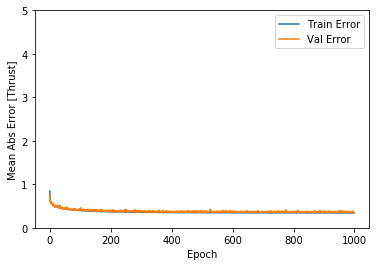

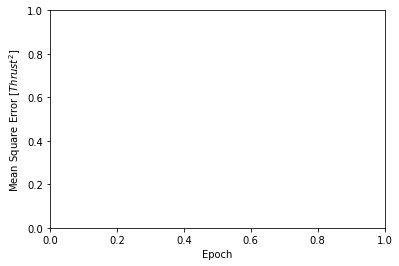

In [16]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Thrust]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$Thrust^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)

In [17]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} Thrust".format(mae))

58696/58696 - 1s - loss: 0.6014 - mean_absolute_error: 0.3418


ValueError: not enough values to unpack (expected 3, got 2)

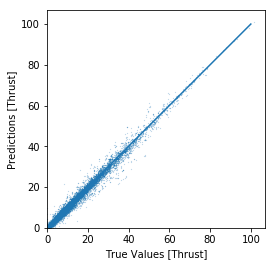

In [18]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions, s=0.01)
plt.xlabel('True Values [Thrust]')
plt.ylabel('Predictions [Thrust]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
# plt.xlim([0,0.5])
# plt.ylim([0,0.5])
_ = plt.plot([-100, 100], [-100, 100])

####  Error Distribution

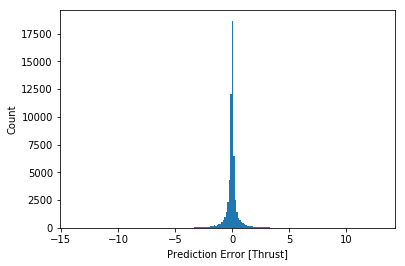

In [19]:
error = test_predictions - test_labels
plt.hist(error, bins = 200)
plt.xlabel("Prediction Error [Thrust]")
_ = plt.ylabel("Count")

## <center>Some Test Cases</center>

In [20]:
input_df = pd.DataFrame([14.3,10.5,4.5,3000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 0.096

      V  diameter  pitch     rpm
0  14.3      10.5    4.5  3000.0
          V  diameter     pitch       rpm
0 -0.775848  -0.00526 -0.838658 -1.050683


array([[0.12570858]], dtype=float32)

In [21]:
input_df = pd.DataFrame([27.6,5.5,4.5,37000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 5.112

      V  diameter  pitch      rpm
0  27.6       5.5    4.5  37000.0
          V  diameter     pitch       rpm
0 -0.484421 -1.119499 -0.838658  2.706217


array([[4.5968213]], dtype=float32)

In [22]:
input_df = pd.DataFrame([54.1,8.5,7,13000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 2.442

      V  diameter  pitch      rpm
0  54.1       8.5    7.0  13000.0
          V  diameter    pitch       rpm
0  0.096242 -0.450955 -0.09199  0.054287


array([[2.4048586]], dtype=float32)

In [23]:
input_df = pd.DataFrame([20.1,11,7,6000]).T
input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
print(input_df)
print(norm(input_df))
model.predict(norm(input_df))
# thrust should be: 1.558

      V  diameter  pitch     rpm
0  20.1      11.0    7.0  6000.0
         V  diameter    pitch       rpm
0 -0.64876  0.106164 -0.09199 -0.719192


array([[1.8309579]], dtype=float32)

### <center>GUI</center>

Prop is available in dataset
only one prop


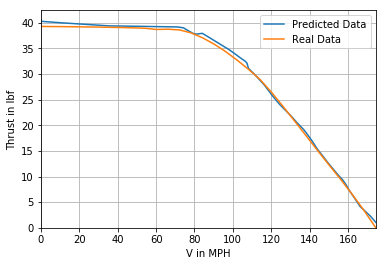

In [24]:
diam = 16
pitch = 10
rpm = 13999
V_values = list(np.linspace(0,200,num=800))

# Predicted Data:
T_values = []
for V_value in V_values:
    input_df = pd.DataFrame([V_value,diam,pitch,rpm]).T
    input_df.columns = ['V', 'diameter', 'pitch', 'rpm']
#     print(input_df)
#     print(norm(input_df))
    T_values.append(model.predict(norm(input_df))[0][0])
    
plt.plot(V_values, T_values, label='Predicted Data')

# Real Data:
prop_df = dataset.loc[dataset['diameter'] == diam].loc[dataset['pitch'] == pitch].loc[dataset['rpm'] == rpm]
if prop_df.shape[0] > 3:    # prop is available in the dataset
    print('Prop is available in dataset')
    if prop_df.loc[prop_df['V'] == 0].index.shape[0] > 1:    # if there are multiple similar props
        V_real = prop_df['V'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        T_real = prop_df['Thrust'].loc[int(prop_df.loc[prop_df['V'] == 0].index[0]):int(prop_df.loc[prop_df['V'] == 0].index[1]-1)]
        print('multiple props')
    else:    # Only one prop
        V_real = prop_df['V']
        T_real = prop_df['Thrust']
        print('only one prop')

    plt.plot(V_real, T_real, label='Real Data')
    plt.xlim([0,V_real.iloc[-1]])
else:
    print('Prop not available in dataset')


plt.ylim([0,plt.ylim()[1]])
plt.xlabel('V in MPH')
plt.ylabel('Thrust in lbf')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
model.save('Fitting_3_model.h5')